## This notebook contains Python code for analyzing data relevant to travelers

In [1]:
import pandas as pd
import numpy as np

import pymysql as mysql
import getpass

import matplotlib.pyplot as plt
import seaborn as sns

We need to connect to MySQL server, and specifically connect to the `ads507airlines` database. Then we verify the connection with a SQL command to show all tables.

In [2]:
conn=mysql.connect(host='localhost',
                   port=int(3306),
                   user='root',
                   passwd=getpass.getpass('Enter password: '),
                   db='ads507airlines')

Enter password:  ···············


In [3]:
tableNames = pd.read_sql("""SHOW TABLES""", conn)

tableNames

,Tables_in_ads507airlines
0,airlines_all2018
1,airlines_all2019
2,airlines_all2020
3,airlines_all2021
4,airlines_all2022
...,...
144,yearly_timedelay_2018
145,yearly_timedelay_2019
146,yearly_timedelay_2020
147,yearly_timedelay_2021


In [4]:
for i in tableNames['Tables_in_ads507airlines']:
    print(i)

airlines_all2018
airlines_all2019
airlines_all2020
airlines_all2021
airlines_all2022
daily_delays_iah2018
daily_delays_iah2019
daily_delays_iah2020
daily_delays_iah2021
daily_delays_iah2022
daily_delays_jfk2018
daily_delays_jfk2019
daily_delays_jfk2020
daily_delays_jfk2021
daily_delays_jfk2022
daily_delays_san2018
daily_delays_san2019
daily_delays_san2020
daily_delays_san2021
daily_delays_san2022
daily_delays_sea2018
daily_delays_sea2019
daily_delays_sea2020
daily_delays_sea2021
daily_delays_sea2022
daily_weather_iah2018
daily_weather_iah2019
daily_weather_iah2020
daily_weather_iah2021
daily_weather_iah2022
daily_weather_jfk2018
daily_weather_jfk2019
daily_weather_jfk2020
daily_weather_jfk2021
daily_weather_jfk2022
daily_weather_san2018
daily_weather_san2019
daily_weather_san2020
daily_weather_san2021
daily_weather_san2022
daily_weather_sea2018
daily_weather_sea2019
daily_weather_sea2020
daily_weather_sea2021
daily_weather_sea2022
delays_weather_iah2018
delays_weather_iah2019
delays_we

### Example for the traveler reviewing historical busy seasons for multiple destinations

In [5]:
query_string = """
SELECT *, 2018 as year FROM seasonal2018
UNION
SELECT *, 2019 as year FROM seasonal2019
UNION
SELECT *, 2020 as year FROM seasonal2020
UNION
SELECT *, 2021 as year FROM seasonal2021
UNION
SELECT *, 2022 as year FROM seasonal2022
;"""

seasonal_df = pd.read_sql(query_string, conn)

seasonal_df

,origin,season,Scheduled_Flights_Count,Total_Delay,year
0,JFK,Winter,27304,9.3643,2018
1,IAH,Winter,40617,11.8805,2018
2,SEA,Winter,29751,1.0323,2018
3,SAN,Winter,20389,9.1960,2018
4,JFK,Spring,26414,12.8258,2018
...,...,...,...,...,...
75,SAN,Summer,24426,20.9871,2022
76,SEA,Autumn,46364,5.4325,2022
77,JFK,Autumn,30859,13.7445,2022
78,IAH,Autumn,33289,6.3260,2022


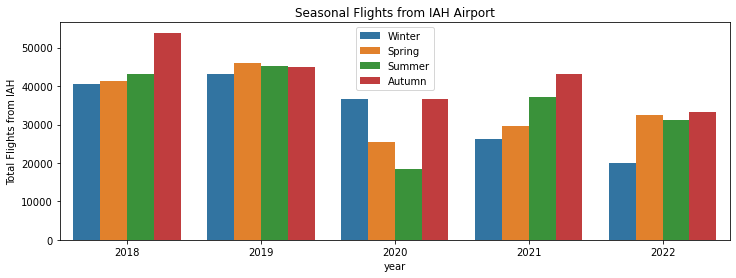

In [6]:
plt.figure(figsize=(12,4))
sns.barplot(data=seasonal_df[seasonal_df['origin']=='IAH'],x='year',y='Scheduled_Flights_Count',
            hue='season')
plt.legend(loc='upper center')
plt.title('Seasonal Flights from IAH Airport')
plt.ylabel('Total Flights from IAH');

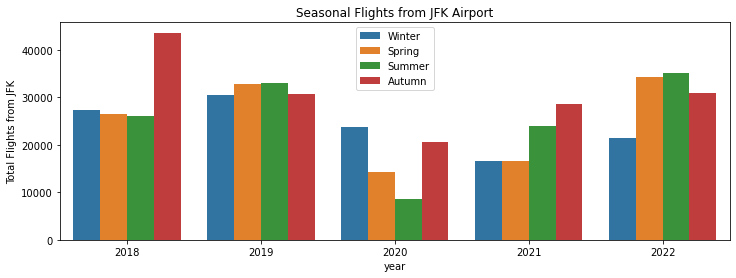

In [7]:
plt.figure(figsize=(12,4))
sns.barplot(data=seasonal_df[seasonal_df['origin']=='JFK'],x='year',y='Scheduled_Flights_Count',
            hue='season')
plt.legend(loc='upper center')
plt.title('Seasonal Flights from JFK Airport')
plt.ylabel('Total Flights from JFK');

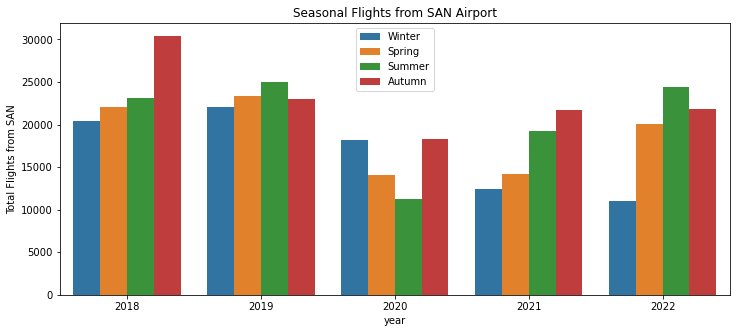

In [8]:
plt.figure(figsize=(12,5))
sns.barplot(data=seasonal_df[seasonal_df['origin']=='SAN'],x='year',y='Scheduled_Flights_Count',
            hue='season')
plt.legend(loc='upper center')
plt.title('Seasonal Flights from SAN Airport')
plt.ylabel('Total Flights from SAN');

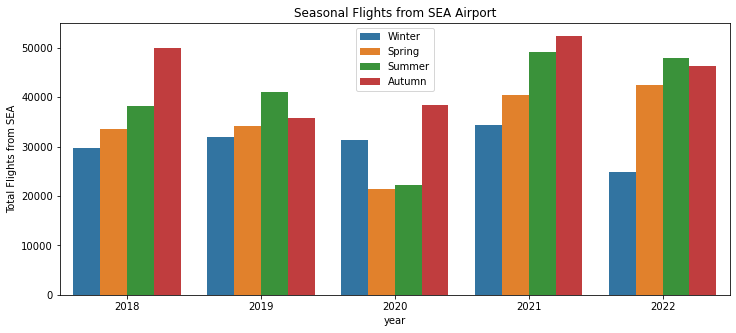

In [9]:
plt.figure(figsize=(12,5))
sns.barplot(data=seasonal_df[seasonal_df['origin']=='SEA'],x='year',y='Scheduled_Flights_Count',
            hue='season')
plt.legend(loc='upper center')
plt.title('Seasonal Flights from SEA Airport')
plt.ylabel('Total Flights from SEA');

### Example for the traveler who wants to understand average flight delays by airline

In [10]:
query_string = """
SELECT *, 2018 as year from yearly_delay2018
UNION
SELECT *, 2019 as year from yearly_delay2019
UNION
SELECT *, 2020 as year from yearly_delay2020
UNION
SELECT *, 2021 as year from yearly_delay2021
UNION
SELECT *, 2022 as year from yearly_delay2022;"""

airlines_df = pd.read_sql(query_string, conn)

airlines_df

,name,carrier,origin,yearly_flight_count,total_delay,year
0,United Air Lines Inc.,UA,IAH,66215,13.2871,2018
1,ExpressJet Airlines LLC d/b/a aha!,EV,IAH,38142,2.8621,2018
2,Mesa Airlines Inc.,YV,IAH,31979,15.3794,2018
3,Republic Airline,YX,IAH,13132,3.6284,2018
4,American Airlines Inc.,AA,IAH,8627,17.3182,2018
...,...,...,...,...,...,...
228,American Airlines Inc.,AA,SEA,4915,26.6757,2022
229,JetBlue Airways,B6,SEA,930,62.9387,2022
230,Spirit Air Lines,NK,SEA,771,20.6200,2022
231,Hawaiian Airlines Inc.,HA,SEA,673,14.5840,2022


In [11]:
pd.DataFrame(airlines_df.groupby('name')['total_delay'].mean()).reset_index().rename(columns={'name':'Airline','total_delay':'Average Delay'})

,Airline,Average Delay
0,Alaska Airlines Inc.,3.444100
1,Allegiant Air,31.024100
2,American Airlines Inc.,13.255315
3,Delta Air Lines Inc.,8.195610
4,Endeavor Air Inc.,3.858787
5,Envoy Air,12.033013
6,ExpressJet Airlines LLC d/b/a aha!,0.786975
7,Frontier Airlines Inc.,17.444220
8,Hawaiian Airlines Inc.,16.677087
9,Horizon Air,13.984950


### Example for the traveler who wants to see average flight delays by destination

In [12]:
query_string = """
SELECT *, 2018 as year from destinations_2018
UNION
SELECT *, 2019 as year from destinations_2019
UNION
SELECT *, 2020 as year from destinations_2020
UNION
SELECT *, 2021 as year from destinations_2021
UNION
SELECT *, 2022 as year from destinations_2022;"""

destinations_df = pd.read_sql(query_string, conn)
destinations_df

,List_of_Destinations,origin,Total_Delay,year
0,SLC,IAH,15.4707,2018
1,CLT,IAH,12.0921,2018
2,ORD,IAH,13.4573,2018
3,DEN,IAH,7.8788,2018
4,MIA,IAH,15.4210,2018
...,...,...,...,...
1748,MIA,SEA,31.8473,2022
1749,MSY,SEA,6.6379,2022
1750,RSW,SEA,16.3758,2022
1751,HDN,SEA,12.1750,2022


In [13]:
destinations_by_delay_df = pd.DataFrame(destinations_df.groupby(['List_of_Destinations','origin'])['Total_Delay'].mean())
destinations_by_delay_df = destinations_by_delay_df.reset_index().rename(columns={'name':'Destination','Total_Delay':'Average Delay'})

destinations_by_delay_df.sort_values(by=['origin','List_of_Destinations'])

,List_of_Destinations,origin,Average Delay
0,ABI,IAH,10.594133
1,ABQ,IAH,11.160900
6,ACY,IAH,0.000000
7,AEX,IAH,4.401940
8,AGS,IAH,17.000000
...,...,...,...
372,STS,SEA,3.369460
375,SUN,SEA,-1.173067
381,TPA,SEA,-1.890160
386,TUS,SEA,2.722760


### Example for the traveler reviewing holiday flights

In [14]:
query_string = """
SELECT *, 2018 as year FROM holidays_2018
UNION
SELECT *, 2019 as year FROM holidays_2019
UNION
SELECT *, 2020 as year FROM holidays_2020
UNION
SELECT *, 2021 as year FROM holidays_2021
UNION
SELECT *, 2022 as year FROM holidays_2022
;"""

holidays_df = pd.read_sql(query_string, conn)

holidays_df

,Holiday,Date,Ave_Depart_Delay,Ave_Arriv_Delay,Total_Flights,year
0,New Year's Day,2018/1/1,14.2966,7.5999,1342,2018
1,Memorial Day,2018/5/28,1.7990,-4.1711,1368,2018
2,Independence Day,2018/7/4,6.7053,3.9067,1286,2018
3,Veterans Day,2018/11/11,4.5738,-1.0531,1450,2018
4,Thanksgiving Eve,2018/11/21,7.6286,2.8916,1532,2018
5,Thanksgiving Day,2018/11/22,0.4572,-8.0525,1028,2018
6,Christmas Eve,2018/12/24,4.5754,-4.3802,1260,2018
7,Christmas Day,2018/12/25,5.2533,-5.2231,1291,2018
8,New Year's Day,2019/1/1,8.9542,0.2557,1396,2019
9,Memorial Day,2019/5/27,6.2528,-3.2782,1535,2019


In [24]:
holiday_delays_df = holidays_df.groupby('Holiday')[['Ave_Depart_Delay','Ave_Arriv_Delay','Total_Flights']].mean()

np.round(holiday_delays_df.reset_index().rename(columns={'Ave_Depart_Delay':'Avg Departure delay',
                                                         'Ave_Arriv_Delay':'Avg Arrival delay',
                                                         'Total_Flights':"Average Flights"}),2)

,Holiday,Avg Departure delay,Avg Arrival delay,Average Flights
0,Christmas Day,5.32,-3.16,1088.50
1,Christmas Eve,6.57,-1.38,1072.25
2,Independence Day,5.08,-2.21,1204.20
3,Memorial Day,3.79,-4.82,1212.80
4,New Year's Day,12.34,4.17,1215.20
5,Thanksgiving Day,2.14,-7.27,882.00
6,Thanksgiving Eve,4.91,-1.97,1337.00
7,Veterans Day,7.04,0.51,1281.00
